In [1]:
import numpy as np
import numpy.linalg as lianlg
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

# 余弦相似度矩阵

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
sim = cosine_similarity(x)+1

In [6]:
for i in range(0,sim.shape[0]):
    for j in range(0,sim.shape[1]):
        if(sim[i,j]<1.997):
            sim[i,j]=0
        sim[i,i]=0

In [7]:
import networkx as nx

In [8]:
matrix = np.ndarray.tolist(sim)

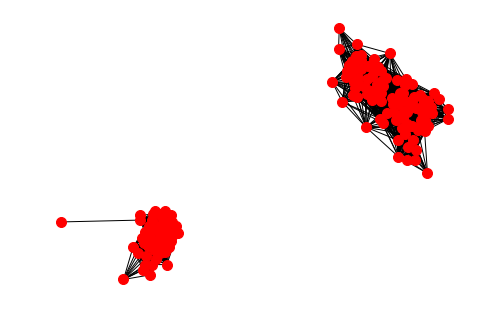

In [9]:
H = nx.Graph()
for i in range(0,150):
    for j in range(i,150):
        if matrix[i][j]!=0:
            H.add_edge(i,j)
nx.draw(H,node_size=100)
plt.show()

# 度数矩阵

In [10]:
d = np.diag(np.zeros(150))

In [11]:
for i in range(150):
    b=0
    for j in range(150):
         if(sim[i,j]!=0):
                b=b+1
    d[i,i]=b

In [12]:
d

array([[45.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 34.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 45., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 62.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 31.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 52.]])

# 标准化的拉普拉斯矩阵

In [13]:
l = d-sim

In [14]:
S = d

In [15]:
for i in range(150):
    S[i,i] = 1/(d[i,i]**(0.5))

In [16]:
L = np.dot(np.dot(S,l),S)

# 求拉普拉斯矩阵的特征值，特征向量（k个最小的特征值对应的特征向量），k为簇数

In [17]:
from numpy import linalg as LA

In [18]:
eig,feature=np.linalg.eig(L)

In [19]:
indices = np.argsort(eig)[:3]

In [20]:
from sklearn.preprocessing import normalize

In [21]:
ksim = normalize(feature[:, indices])

# k-means聚类的Python实现

In [22]:
#随机获取 k 个质心
def Center(data,k):
    indexs = np.random.random_integers(0,len(data)-1,k)
    centers = []
    for index in indexs:
        centers.append(data[index])
    return centers

In [23]:
#欧式距离
def Distance(vec1,vec2):
    dist = np.sqrt(np.sum(np.square(vec1 - vec2)))
    #dist = numpy.linalg.norm(vec1 - vec2)  
    return dist

In [24]:
#k-means聚类
def kmeans(data, k, Distance = Distance, Center = Center):
    num = data.shape[0]
    #存放该样本属于哪类，及质心距离
    clusterAssment = np.mat(np.zeros((num, 2)))
    centroids = Center(data,k)
    centroids = np.array(centroids)   
    centroids = np.array([[ 1.,          0.,          0.,        ],
                          [ 0.,         -0.68347619,  0.69753973],
                          [ 0.,         -0.74373286, -0.61969235]])
    #用于判断是否已经收敛
    clusterChanged = True
 
    while clusterChanged:
        clusterChanged = False

        for i in range(num):
            minDist  = 100000
            minIndex = -1
            
            for j in range(k):
                distJI = Distance(centroids[j,:], data[i,:])
                if distJI < minDist:
                    minDist  = distJI
                    minIndex = j #如果第i个数据点到第j个中心点更近，则将i划分到j中
            
            if clusterAssment[i, 0] != minIndex:
                    clusterChanged = True
                    clusterAssment[i, :] = minIndex, minDist**2 #将第i个数据点的分配情况存入字典
        #更新中心点
        for center in range(k):
            ptsInClust = data[np.nonzero(clusterAssment[:,0].A == center)[0]] #.A将matrix转化为array，nonzero返回=center的下标
            centroids[center,:] = np.mean(ptsInClust, axis = 0)
    return centroids, clusterAssment        

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
for i in range(1):
    centroids,clustAssment = kmeans(ksim,3)
    a=clustAssment.A[:,0]
    print(centroids)
    print(accuracy_score(y,a))

[[ 1.          0.          0.        ]
 [ 0.         -0.68347619  0.69753973]
 [ 0.         -0.74373286 -0.61969235]]
0.9666666666666667


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 149 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [32]:
node_color=[]
node_color0=[]
node_color1=[]
node_color2=[]
for i in range(150):
    if(a[i]==0):
        color = 'r'
        node_color0.append(color)
    elif(a[i]==1):
        color = 'g'
        node_color1.append(color)
    else:
        color = 'b'
        node_color1.append(color)
        
    node_color.append(color)

In [33]:
import networkx as nx

In [45]:
Matrix = np.ndarray.tolist(sim)

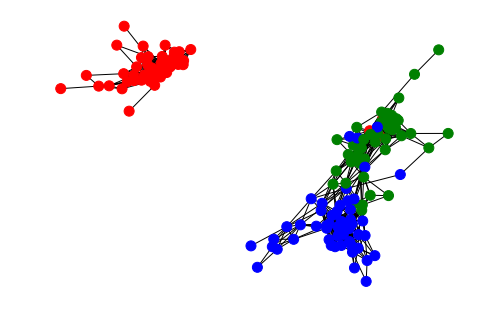

In [60]:
H = nx.Graph()
for i in range(0,150):
    for j in range(i,150):
        if matrix[i][j]>1.9991:
            H.add_edge(i,j)
nx.draw(H,node_color=node_color,node_size=100)
plt.show()